In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from scipy.spatial import distance_matrix

In [2]:
cities = pd.read_csv('Qatar.txt', sep=' ', names = ['lat','lon']).round()
cities.head()
cc = cities.values

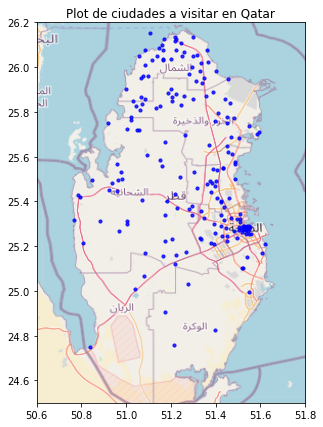

In [3]:
cities = cities/1000
bounds = (50.6, 51.8,24.5,26.2)
qat = plt.imread("map.png")
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(cities.lon, cities.lat, zorder=1, alpha= 0.8, c='b', s=10)
ax.set_title('Plot de ciudades a visitar en Qatar')
ax.set_xlim(bounds[0],bounds[1])
ax.set_ylim(bounds[2],bounds[3])
ax.imshow(qat, zorder=0, extent = bounds, aspect= 'equal')
plt.savefig("qatar.png")


In [4]:
def nearest_n(cc):
    distances = distance_matrix(cc,cc)
    optimal_route = []
    optimal_dist = 1000000
    N = cc.shape[0]
    contador = 0
    for city_index in range(N):
        dist = 0
        not_visited = np.ones(N, dtype=bool)
        not_visited[city_index] = False
        sol = [] 
        if (sum(not_visited) != 0):
            [sol,dist] = nearest_n2(city_index, not_visited, sol, dist, distances) 
        dist =dist+ distances[sol[0]][sol[-1]]
        sol.append(sol[0])
        #print(dist)
        if dist < optimal_dist:
            optimal_dist = dist
            optimal_route = sol
    return [optimal_route, round(optimal_dist,2)]

def nearest_n2(city_index, not_visited ,sol, dist, distances):
    city_dist = distances[city_index]
    nn_dist = min(city_dist[not_visited])
    nn_indexes = np.where(city_dist == nn_dist)[0]
    if len(nn_indexes > 1):
        n=0
        while not_visited[nn_indexes[n]]==False & n<=len(nn_indexes):
            nn_index = np.where(city_dist == nn_dist)[0][n+1]
            n = n+1
        else:
            nn_index = np.where(city_dist == nn_dist)[0][0]
    not_visited[nn_index] = False
    
    if (sum(not_visited) != 0):
        [sol,dist] = nearest_n2(nn_index, not_visited, sol, dist, distances)
    else:
        sol.append(nn_index)
    
    sol.append(city_index)
    dist = dist + nn_dist

    return [sol, dist]

start = time.time()
x = nearest_n(cc)
end = time.time()



In [5]:
print("Ruta: ", x[0])
print("Distancia total: ",x[1])
print(len(x[0]))
print("Tiempo: ", round(end-start,4), " segundos")
print("Tiempo por iteración: ", round((end-start)/194,4))

Ruta:  [19, 6, 3, 1, 2, 4, 8, 9, 11, 14, 18, 159, 193, 175, 181, 182, 185, 186, 189, 191, 188, 190, 187, 192, 184, 170, 165, 161, 157, 158, 164, 167, 166, 169, 179, 177, 176, 180, 183, 174, 172, 173, 178, 171, 168, 163, 162, 160, 155, 129, 97, 85, 84, 64, 62, 35, 61, 58, 22, 24, 70, 75, 86, 79, 81, 88, 89, 93, 98, 100, 103, 110, 118, 121, 117, 99, 83, 44, 56, 59, 68, 73, 71, 74, 77, 90, 102, 101, 108, 112, 113, 125, 124, 126, 131, 133, 136, 139, 144, 148, 145, 141, 137, 138, 140, 156, 153, 143, 149, 152, 151, 146, 150, 154, 142, 147, 135, 130, 128, 134, 132, 123, 122, 127, 119, 120, 116, 115, 114, 111, 109, 107, 106, 105, 104, 96, 92, 95, 94, 91, 87, 82, 80, 78, 76, 69, 63, 67, 72, 65, 66, 60, 53, 49, 54, 48, 43, 41, 34, 29, 31, 30, 33, 39, 42, 37, 40, 45, 47, 51, 52, 55, 57, 50, 46, 38, 36, 26, 21, 28, 27, 32, 17, 20, 23, 25, 16, 10, 13, 12, 15, 7, 5, 0, 19]
Distancia total:  11621.96
195
Tiempo:  65.5069  segundos
Tiempo por iteración:  0.3377


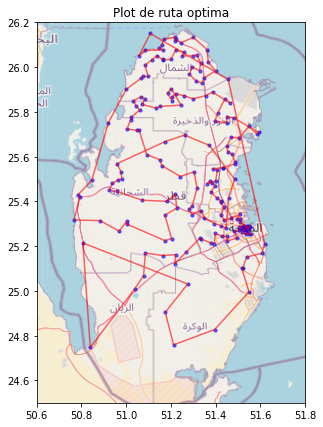

In [6]:
bounds = (50.6, 51.8,24.5,26.2)
qat = plt.imread("map.png")
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(cities.lon, cities.lat, zorder=1, alpha= 0.6, c='b', s=10)
route = x[0]
longs = cities.lon.values
lats = cities.lat.values
plotx=[]
ploty=[]
for p in route:
    plotx.append(longs[p])
    ploty.append(lats[p])

ax.plot(plotx,ploty, 'red', alpha=.6)
ax.set_title('Plot de ruta optima')
ax.set_xlim(bounds[0],bounds[1])
ax.set_ylim(bounds[2],bounds[3])
ax.imshow(qat, zorder=0, extent = bounds, aspect= 'equal')
plt.savefig("qatar2.png")